In [ ]:
# import libraries
from numpy import array

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
# define univariate time series
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# transform to a supervised learning problem
X, y = split_sequence(raw_seq, n_steps)
print(X.shape, y.shape)

# show each sample
for i in range(len(X)):
    print(X[i], y[i])

(6, 3) (6,)
[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [ ]:
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

(6, 3, 1)


In [ ]:
# MLP with an input layer

model = Sequential()
model.add(Dense(100, activation= 'relu' , input_dim=n_steps))
model.add(Dense(1))
model.summary()

# configure the model
model.compile(optimizer= 'adam' , loss= 'mse' )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training
# fit model
history = model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))

yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.775185]]



In the below code:

We generate a different univariate time series dataset with trend and seasonality.
We define and train MLP, CNN, and RNN models.
We test each model on a sample input.
We print the predictions made by each model.
We plot the training loss comparison for MLP, CNN, and RNN models.

MLP Prediction: 0.32817295
CNN Prediction: 0.32389516
RNN Prediction: 0.32086566


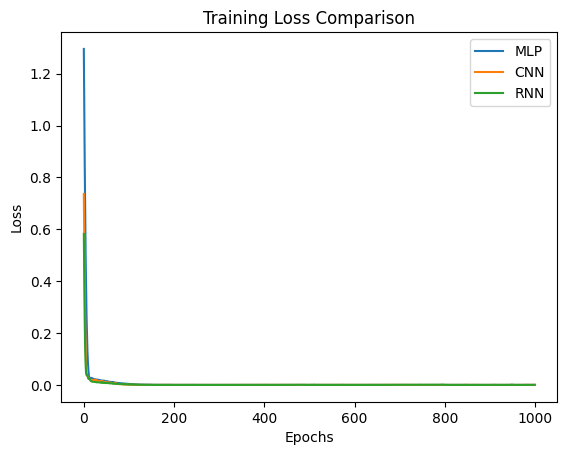

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import matplotlib.pyplot as plt  # Import matplotlib.pyplot module
from sklearn.metrics import mean_squared_error

# Define a different univariate time series dataset with trend and seasonality
# Example dataset with trend and seasonality
def generate_seasonal_trend_data(n_steps):
    return np.sin(0.1*np.arange(n_steps)) + np.arange(n_steps) * 0.01

# Generate dataset
raw_seq = generate_seasonal_trend_data(100)

# Define the number of time steps
n_steps = 3

# Split sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Split sequence into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape input from [samples, features] to [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define and train MLP model
mlp_model = Sequential([
    Dense(100, activation='relu', input_shape=(n_steps,)),
    Dense(1)
])
mlp_model.compile(optimizer='adam', loss='mse')
mlp_history = mlp_model.fit(X, y, epochs=1000, verbose=0)

# Define and train CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')
cnn_history = cnn_model.fit(X, y, epochs=1000, verbose=0)

# Define and train RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_history = rnn_model.fit(X, y, epochs=1000, verbose=0)

# Test MLP model
x_input = np.array([generate_seasonal_trend_data(n_steps)])
x_input = x_input.reshape((1, n_steps))
mlp_yhat = mlp_model.predict(x_input, verbose=0)

# Test CNN model
x_input = x_input.reshape((1, n_steps, 1))
cnn_yhat = cnn_model.predict(x_input, verbose=0)

# Test RNN model
rnn_yhat = rnn_model.predict(x_input, verbose=0)

# Print predictions
print("MLP Prediction:", mlp_yhat[0][0])
print("CNN Prediction:", cnn_yhat[0][0])
print("RNN Prediction:", rnn_yhat[0][0])

# Plot training loss for MLP, CNN, and RNN
plt.plot(mlp_history.history['loss'], label='MLP')
plt.plot(cnn_history.history['loss'], label='CNN')
plt.plot(rnn_history.history['loss'], label='RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

